In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
import random

In [3]:
L = []
for i in range(10000):
    a = random.randint(1,6)
    b = random.randint(1,6)
    
    L.append(a + b)

In [4]:
len(L)

10000

In [5]:
L[:5]

[6, 11, 11, 7, 12]

In [6]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

In [7]:
import numpy as np
np.cumsum(s)

2     0.0257
3     0.0812
4     0.1627
5     0.2716
6     0.4140
7     0.5819
8     0.7201
9     0.8302
10    0.9153
11    0.9723
12    1.0000
Name: count, dtype: float64

<Axes: >

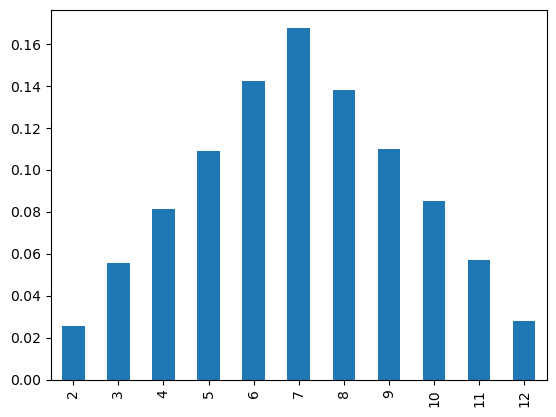

In [8]:
s.plot(kind='bar')

<Axes: >

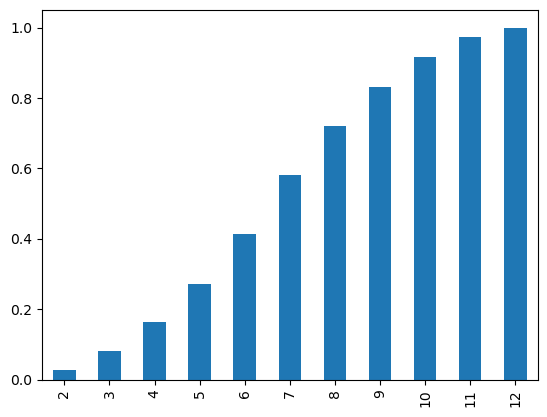

In [9]:
np.cumsum(s).plot(kind='bar')

### Parameteric Density Estimation

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50, scale=5, size=1000)

In [11]:
sample.mean()

49.97924912504335

(array([ 11.,  41., 106., 186., 218., 214., 137.,  68.,  17.,   2.]),
 array([34.68013195, 37.92636662, 41.17260129, 44.41883596, 47.66507063,
        50.9113053 , 54.15753997, 57.40377464, 60.65000931, 63.89624398,
        67.14247865]),
 <BarContainer object of 10 artists>)

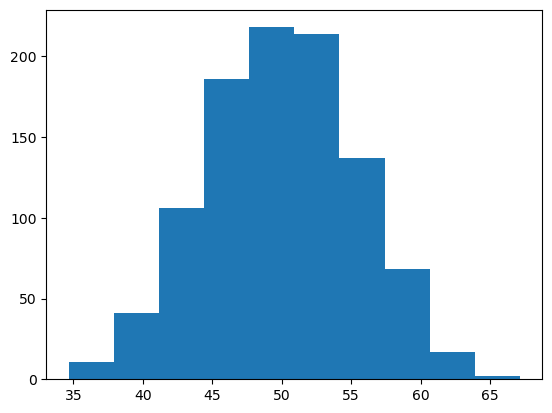

In [12]:
# Plot histogram to understand the distribution of data
plt.hist(sample, bins=10)

In [13]:
# Calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [14]:
# fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(60, 12)

In [15]:
values = np.linspace(sample.min(), sample.max(), 100)

In [16]:
sample.max()

67.142478646321

In [17]:
probabilities = [dist.pdf(value) for value in values]

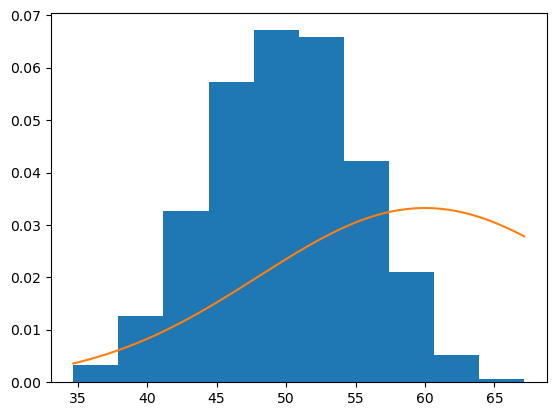

In [18]:
# Plot the histogram and pdf
plt.hist(sample, bins=10, density=True)
plt.plot(values, probabilities)

<Axes: ylabel='Density'>

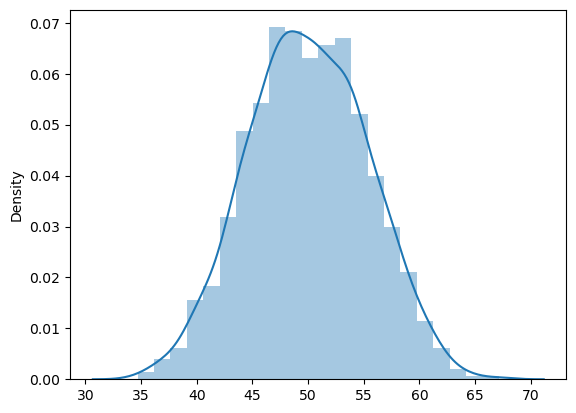

In [19]:
import seaborn as sns
sns.distplot(sample)

### KDE

In [20]:
# Generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

In [21]:
sample

array([21.35002759, 15.89798182, 22.23872313, 13.27716064, 18.8404949 ,
       28.86950092, 20.83122061, 17.6183233 , 20.70409235, 20.83808955,
       15.5850643 , 21.93980312, 23.51632391, 24.87045677, 20.66938688,
       21.00909421, 15.59870254, 24.57443549, 24.64581982, 22.53264192,
       24.06960414, 18.02346167, 21.81760783, 18.17204996, 17.23973294,
       19.17142955, 29.81788627, 15.54285367, 28.89170634, 25.39935449,
       23.83880038, 22.87220302, 13.01056246, 24.44017424, 19.84412349,
       23.75619289, 10.11946274, 15.86578478, 20.42878792, 21.62140776,
       23.19618277, 22.20405963, 24.6483157 , 24.50548432, 18.2687632 ,
       32.94291095, 20.25844873, 23.43059845, 23.41143541, 32.77170283,
        6.13478567, 24.55235078, 20.03559063, 30.73841632, 16.9065489 ,
       12.28577872, 19.7734377 , 21.95517696, 16.49241158, 19.33806587,
       23.15358367, 19.05777374, 16.51419208, 13.83359997, 15.74091993,
       17.60073951, 16.75651497, 30.56367777, 21.3891908 , 25.54

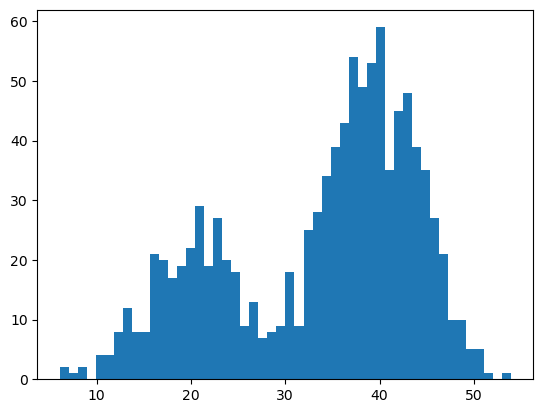

In [22]:
# plot histogram bins=50
plt.hist(sample, bins=50)
plt.show()

In [23]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

# Convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=5)

In [24]:
values = np.linspace(sample.min(), sample.max(), 100)
values = values.reshape((len(values), 1))

In [25]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

`score_samples(values)` return the log-density estimate of the input sample values. This is because the `score_samples()` method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

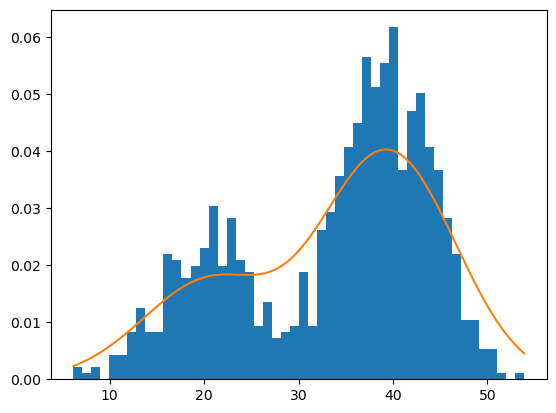

In [26]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

<Axes: ylabel='Density'>

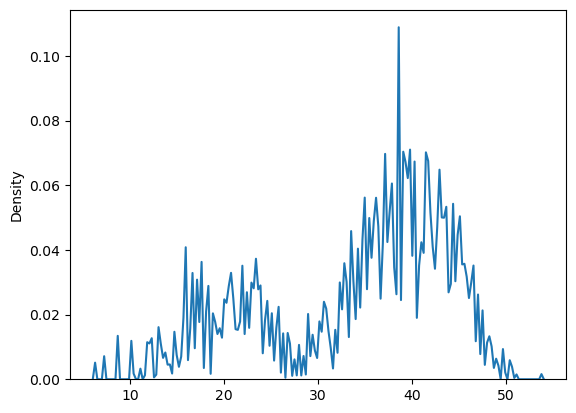

In [27]:
sns.kdeplot(sample.reshape(1000), bw_adjust=0.02)

In [28]:
import seaborn as sns

In [29]:
df = sns.load_dataset('iris')

In [30]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

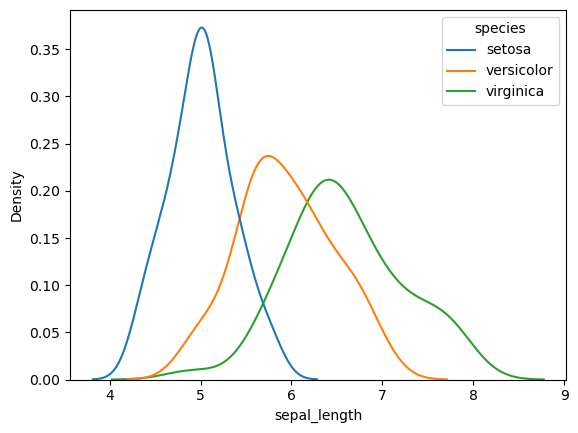

In [31]:
sns.kdeplot(data=df, x='sepal_length', hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

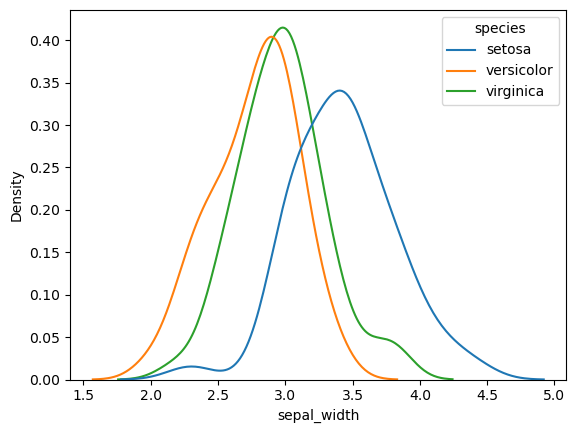

In [32]:
sns.kdeplot(data=df, x='sepal_width', hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

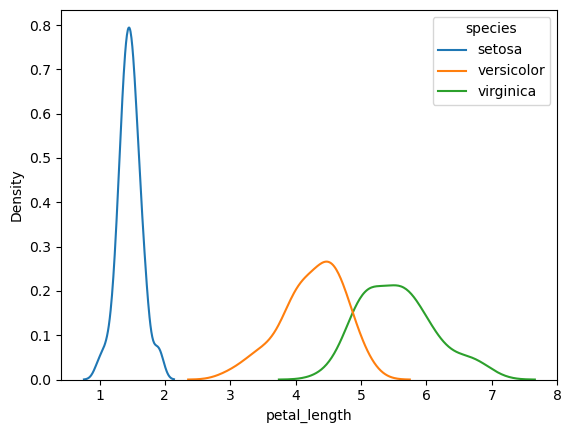

In [33]:
sns.kdeplot(data=df, x='petal_length', hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

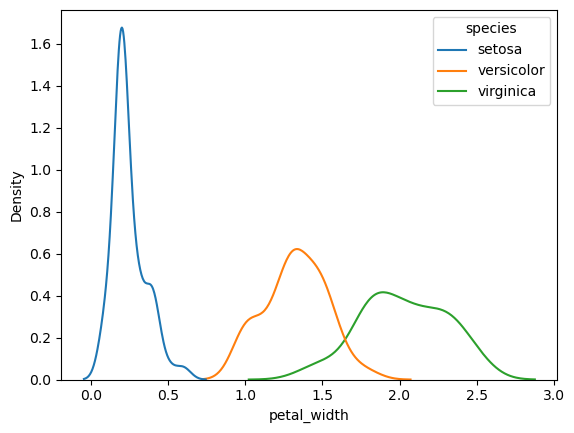

In [34]:
sns.kdeplot(data=df, x='petal_width', hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

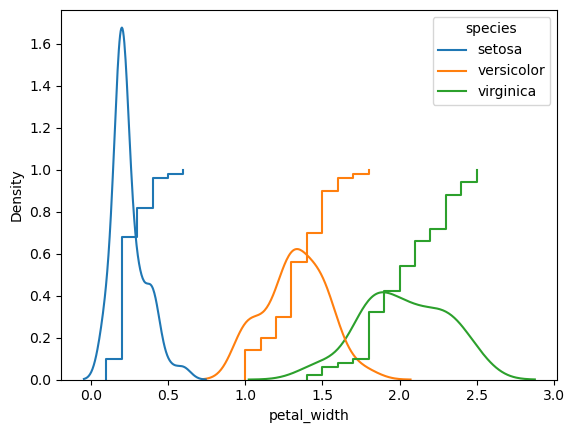

In [35]:
sns.kdeplot(data=df, x='petal_width', hue='species')
sns.ecdfplot(data=df, x='petal_width', hue='species')

In [36]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [37]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

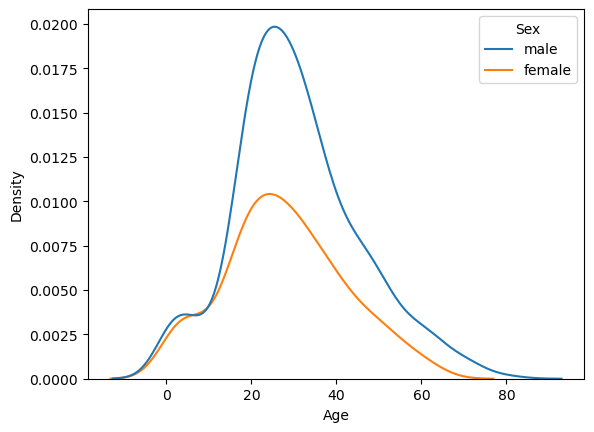

In [38]:
sns.kdeplot(data=titanic, x='Age', hue='Sex')

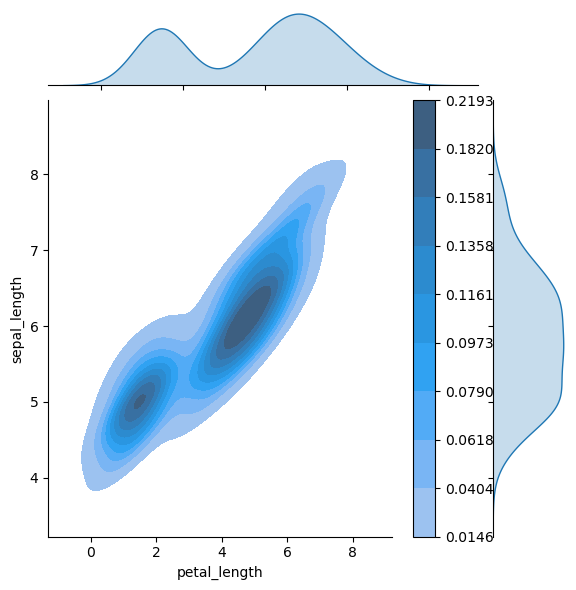

In [39]:
sns.jointplot(data=df, x='petal_length', y='sepal_length', kind='kde', fill=True, cbar=True)

<Axes: xlabel='Age', ylabel='Density'>

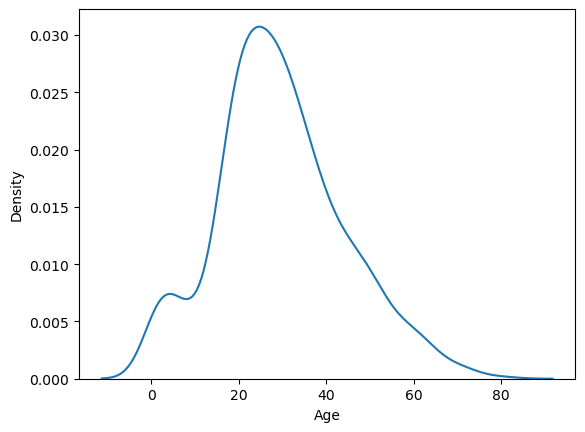

In [40]:
sns.kdeplot(titanic['Age'])

In [41]:
titanic['Age'].mean()

29.69911764705882

In [42]:
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std()

<Axes: xlabel='Age', ylabel='Density'>

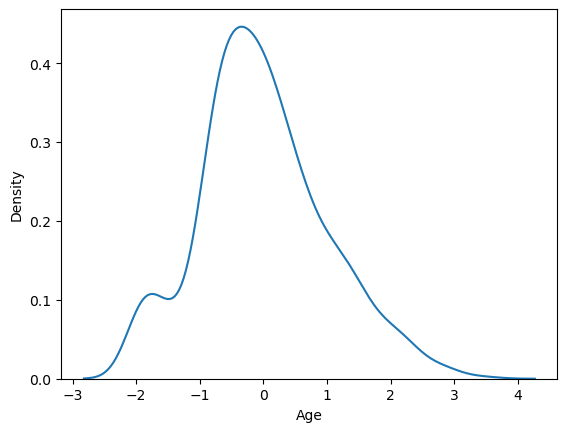

In [43]:
sns.kdeplot(x)

In [44]:
x.mean()

2.388378943731429e-16

In [45]:
x.std()

0.9999999999999994

In [46]:
titanic['Age'].skew()

0.38910778230082704

In [47]:
titanic['Age'].mean() + 3*titanic['Age'].std()

73.27860964406095

In [48]:
titanic['Age'].mean() - 3*titanic['Age'].std()

-13.88037434994331

In [49]:
titanic[titanic['Age'] > 73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


In [50]:
titanic['Age'].max()

80.0